In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from IPython.display import Image

In [2]:
mortality_ca = pd.read_csv("Resources/mortality_2006_2010_clean.csv")
pollution_ca = pd.read_csv("Resources/pollution_2006_2010.csv")

In [3]:
diseases = mortality_ca["ICD-10 113 Cause List"].unique().tolist()
print(diseases, len(diseases))

['Influenza and pneumonia (J09-J18)', 'Pneumonia (J12-J18)', 'Chronic lower respiratory diseases (J40-J47)', 'Bronchitis, chronic and unspecified (J40-J42)', 'Emphysema (J43)', 'Asthma (J45-J46)', 'Other chronic lower respiratory diseases (J44,J47)', 'Pneumonitis due to solids and liquids (J69)', 'Other diseases of respiratory system (J00-J06,J30- J39,J67,J70-J98)', 'Influenza (J09-J11)'] 10


In [4]:
counties_list = pollution_ca["County"].unique().tolist()
print(counties_list, len(counties_list))

['Contra Costa', 'Humboldt', 'Imperial', 'Los Angeles', 'Orange', 'Riverside', 'Sacramento', 'San Bernardino', 'San Diego', 'San Francisco', 'Santa Barbara', 'Santa Cruz', 'Solano', 'Alameda', 'Fresno', 'Santa Clara'] 16


In [5]:
clrd_mortality = mortality_ca[mortality_ca["ICD-10 113 Cause List"] == 
                                         "Chronic lower respiratory diseases (J40-J47)"]
# clrd_mortality.head()

In [6]:
grouped_clrd = clrd_mortality.groupby(["County", "Year"])["Deaths"].agg([np.sum])
grouped_clrd1 = grouped_clrd.rename(columns={"sum": "Death"})
grouped_clrd1

Death
County  Year       
Alameda 2006  422.0
        2007  405.0
        2008  455.0
        2009  419.0
        2010  399.0
...             ...
Solano  2006  143.0
        2007  127.0
        2008  125.0
        2009  137.0
        2010  163.0

[80 rows x 1 columns]

In [7]:
pollutants_cc = pollution_ca[pollution_ca["County"] == "Contra Costa"]
# pollutants_cc

In [8]:
no2_pollutants_cc = pollutants_cc.groupby(["County", "Year"])["NO2 AQI"].agg([np.sum])
no2_pollutants_cc1 = no2_pollutants_cc.rename(columns={"sum": "NO2 AQI"})
no2_pollutants_cc1

NO2 AQI
County       Year         
Contra Costa 2006   110996
             2007   105384
             2008   102224
             2009    49088
             2010    51344

In [9]:
clrd_deaths_cc = grouped_clrd1.filter(like="Contra Costa", axis=0)
clrd_deaths_cc

Death
County       Year       
Contra Costa 2006  386.0
             2007  367.0
             2008  410.0
             2009  400.0
             2010  370.0

In [10]:
cc_merged = pd.merge(no2_pollutants_cc1, clrd_deaths_cc, on="Year")
cc_merged1 = cc_merged.reset_index()
cc_merged2 = cc_merged1.rename(columns={"Death": "Contra Costa"})
cc_merged2

,Year,NO2 AQI,Contra Costa
0,2006,110996,386.0
1,2007,105384,367.0
2,2008,102224,410.0
3,2009,49088,400.0
4,2010,51344,370.0


In [11]:
def line_plots(s):
    x = s["Year"]
    y1 = s[s.columns[1]] 
    y2 = s[s.columns[2]]
    fig, ax = plt.subplots()
    ax.plot(x, y1, color="blue", marker="o")

    ax2 = ax.twinx()
    ax2.plot(x, y2, color="red", marker="o")

    ax.xaxis.set_ticks(x)
    ax.set_xlabel("Year")
    ax.set_ylabel(f"Total {s.columns[1]}")
    ax2.set_ylabel("Number of Deaths")

    red_patch = mpatches.Patch(color="blue", label=s.columns[1])
    blue_patch = mpatches.Patch(color="red", label="Deaths")
    plt.legend(handles=[red_patch, blue_patch])

    plt.title(f"""
    Number of Chronic Lower Respiratory Diseases Deaths in {s.columns[2]} 
    vs Total {s.columns[1]} (Air Qualitity Index) | 2006-2010
    """)
    plt.show()
    plt.tight_layout()

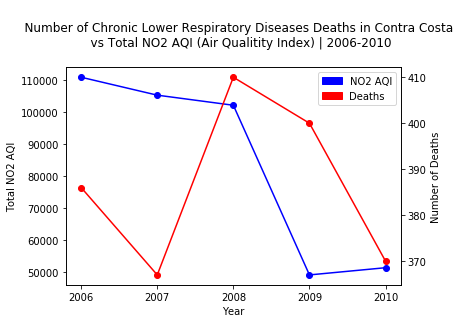

<Figure size 432x288 with 0 Axes>

In [12]:
line_plots(cc_merged2)

In [ ]:
# 'Contra Costa', 'Humboldt', 'Imperial', 'Los Angeles', 'Orange', 'Riverside', 
# 'Sacramento', 'San Bernardino', 'San Diego', 'San Francisco', 'Santa Barbara', 'Santa Cruz', 
# 'Solano', 'Alameda', 'Fresno', 'Santa Clara'

In [13]:
o3_pollutants_cc = pollutants_cc.groupby(["County", "Year"])["O3 AQI"].agg([np.sum])
o3_pollutants_cc1 = o3_pollutants_cc.rename(columns={"sum": "O3 AQI"})
o3_pollutants_cc1

O3 AQI
County       Year        
Contra Costa 2006  186384
             2007  173676
             2008  184504
             2009  101828
             2010  110536

In [14]:
cc_merged_o3 = pd.merge(o3_pollutants_cc1, clrd_deaths_cc, on="Year")
cc_merged_o3_1 = cc_merged_o3.reset_index()
cc_merged_o3_2 = cc_merged_o3_1.rename(columns={"Death": "Contra Costa"})
cc_merged_o3_2

,Year,O3 AQI,Contra Costa
0,2006,186384,386.0
1,2007,173676,367.0
2,2008,184504,410.0
3,2009,101828,400.0
4,2010,110536,370.0


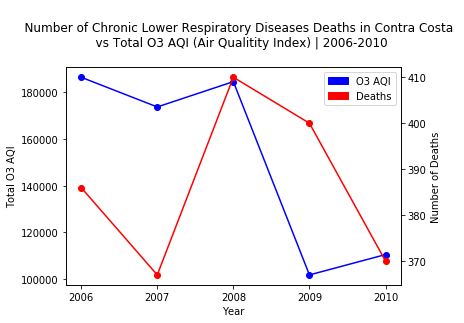

<Figure size 432x288 with 0 Axes>

In [16]:
line_plots(cc_merged_o3_2)

In [17]:
so2_pollutants_cc = pollutants_cc.groupby(["County", "Year"])["SO2 AQI"].agg([np.sum])
so2_pollutants_cc1 = so2_pollutants_cc.rename(columns={"sum": "SO2 AQI"})
so2_pollutants_cc1

SO2 AQI
County       Year         
Contra Costa 2006  19562.0
             2007  16472.0
             2008  13058.0
             2009   4634.0
             2010   5174.0

In [24]:
cc_merged_so2 = pd.merge(so2_pollutants_cc1, clrd_deaths_cc, on="Year")
cc_merged_so2_1 = cc_merged_so2.reset_index()
cc_merged_so2_2 = cc_merged_so2_1.rename(columns={"Death": "Contra Costa"})
cc_merged_so2_2

,Year,SO2 AQI,Contra Costa
0,2006,19562.0,386.0
1,2007,16472.0,367.0
2,2008,13058.0,410.0
3,2009,4634.0,400.0
4,2010,5174.0,370.0


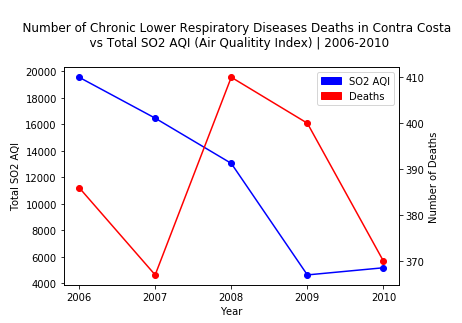

<Figure size 432x288 with 0 Axes>

In [25]:
line_plots(cc_merged_so2_2)

In [20]:
co_pollutants_cc = pollutants_cc.groupby(["County", "Year"])["CO AQI"].agg([np.sum])
co_pollutants_cc1 = co_pollutants_cc.rename(columns={"sum": "CO AQI"})
co_pollutants_cc1

CO AQI
County       Year         
Contra Costa 2006  16718.0
             2007  14274.0
             2008  12568.0
             2009   6488.0
             2010   8026.0

In [26]:
cc_merged_co = pd.merge(co_pollutants_cc1, clrd_deaths_cc, on="Year")
cc_merged_co_1 = cc_merged_co.reset_index()
cc_merged_co_2 = cc_merged_co_1.rename(columns={"Death": "Contra Costa"})
cc_merged_co_2

,Year,CO AQI,Contra Costa
0,2006,16718.0,386.0
1,2007,14274.0,367.0
2,2008,12568.0,410.0
3,2009,6488.0,400.0
4,2010,8026.0,370.0


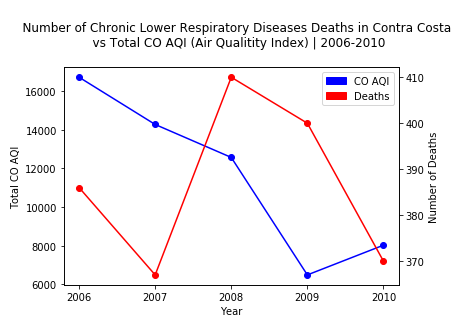

<Figure size 432x288 with 0 Axes>

In [27]:
line_plots(cc_merged_co_2)